## REFERENCE

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

- Logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes

- Logistic Regression could help use predict whether the student passed or failed. Logistic regression predictions are discrete (only specific values or categories are allowed). We can also view probability scores underlying the model’s classifications.

#### Cost function

z = wx + b

In linear regression, they used MSE. In logistic, we have 1/(1 + e^(-z)), if we square the cost of this, there will be a non-convex function of parameters, hard to optimize.

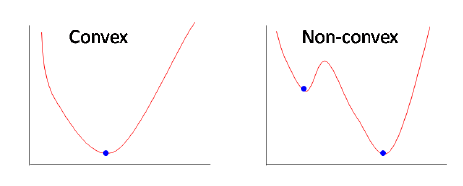

L = -ylog(y^) - (1-y)log(1-y^)

Gradient descent:

dL / dw = (y^ - y)x

dL / db = (y^ - y)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Build class

In [173]:
class LogisticRegressionLL:
    def __init__(self):
        self.w = None
        self.b = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, learning_rate = 0.001, iteration = 1000):
        y = y.reshape((y.shape[0], 1))
        '''
        Exp: 
            X.shape = (300, 3)
            y.shape = (300, 1)
            self.w.shape = (3, 1)
            self.b.shape = (1, 1)
        '''

        self.w = np.random.rand(X.shape[1], 1)
        self.b = np.random.rand(1, 1)
        n = X.shape[0]

        for _ in range(iteration):
            predictions = np.dot(X, self.w) + self.b
            predictions = self.sigmoid(predictions)

            self.w = self.w - learning_rate * (1 / n) * X.T.dot(predictions - y)
            self.b = self.b - learning_rate * np.mean((predictions - y)) 

    def predict(self, X):
        raw_predict = np.dot(X, self.w) + self.b
        posibilities = self.sigmoid(raw_predict)
        result = []
        for i in posibilities:
            if (i >= 0.5):
                result.append(1)
            else:
                result.append(0)
        return np.array(result)

## Generate Dataset

In [174]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500,random_state=7)

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)

## Train model

In [176]:
modelLL = LogisticRegressionLL()
modelLL.fit(X_train, y_train)

In [177]:
predictionsLL = modelLL.predict(X_test)
print(predictionsLL)

[1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0
 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1
 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1]


## Compare with sklearn model

In [178]:
from sklearn.linear_model import LogisticRegression
modelsk = LogisticRegression()
modelsk.fit(X_train, y_train)
predictionsSK = modelsk.predict(X_test)
print(predictionsSK)

[1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1
 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0]


In [179]:
from sklearn.metrics import accuracy_score

print("SKlearn model: ", accuracy_score(y_test, predictionsSK))
print("Self model: ", accuracy_score(y_test, predictionsLL))

SKlearn model:  0.79
Self model:  0.75
